# <center> Machine Learning  Project - Advanced Level  </center>
## <center> Radiation  Prediction  Project </center>

-The current process suffers from the following problems:

The solar radiation is dependent on Humidity and Temperature.
Measuring solar radiation using different devices requires a lot of manpower and resources.
It takes a lot of time fixing the sensors and interpreting the readings from the different devices which becomes inefficient as time goes by.

The company has hired you as data science consultants. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.

Your Role
You are given a dataset containing measurements for the past 4 months.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables
Deliverable: Solar Radiation Prediction.
Machine Learning Task: Regression
Target Variable: Radiation
Win Condition: N/A (best possible model)

Evaluation Metric
The model evaluation will be based on the RMSE score.
To learn about RMSE’s Python implementation, please visit this link.

## 1 Import Libraries

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()
import datetime as date
import datetime as time
from datetime import timedelta
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn import metrics

In [114]:
import sklearn.metrics
from sklearn.preprocessing import StandardScaler                    
from sklearn.model_selection import train_test_split                
from sklearn.ensemble import RandomForestRegressor                  
from sklearn.linear_model import LinearRegression       
from random import randint           
import statsmodels.api as sm
import scipy.stats as stats
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer as ct
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline as pipe
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.utils import shuffle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import AdaBoostRegressor
import graphviz
from graphviz import Source

In [115]:
# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

In [116]:
import gc
import warnings
from   tqdm import tqdm_notebook

## 2 Data Overview

The goal of this section is to :

- Load the radiation dataset
- Explore the features
- Load the radiatiom dataset using pd.read_csv().


In [117]:
#%%time
train = pd.read_csv("solar_train.csv")
train
test = pd.read_csv("solar_test.csv")

### Data Description

The dataset contains 4 months of the measurements.

The data comes directly from NASA’s weather research lab based on actual reading taken by their sensors situated at different locations.

This is the data that we have to predict for future samples.


The dataset is divided into two parts: Train and Test sets.

Train Set:
The train set contains 26148 rows and 12 columns.
The last column Radiation is the target variable.

Test Set:
The test set contains 6538 rows and 11 columns.
The test set doesn’t contain the Radiation column.
It needs to be predicted for the test set.

Sample Submission File:
A sample submission csv file named sample_submission.csv is also provided with the dataset.
This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.

__Id__-	Unique identity of each observation.
__UNIXTime__-	Track time as a running total of seconds.
__Data__-	Day and time at which the reading was started in hh:mm: ss 24-hour format.
__Time__-	Time at which the reading was taken in 24-hour format.
__Temperature__-	Temperature during the daytime in degrees Fahrenheit(°F).
__Pressure__-	Barometric pressure(Hg).
__Humidity__-	Humidity per cent during the daytime(%).
__WindDirection(Degrees)__-	Direction of wind in degrees (°).
__Speed__-|	Speed of wind in miles per hour (mph).
__TimeSunRise__-	Time of sunrise in the morning(Hawaii time).
__TimeSunSet__-	Time of sunset in the evening(Hawaii time).
__Radiation__-|	Solar radiation measured in watts per meter^2 (W/m2).


## 3. Optimize Memory Used by Data

In [118]:
train.memory_usage(deep=True).sum() / 1024**2
test.memory_usage(deep=True).sum() / 1024**2

2.0545873641967773

In [119]:
train.dtypes

Id                          int64
UNIXTime                    int64
Data                       object
Time                       object
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
Radiation                 float64
dtype: object

##  4. Understand/Exploring  the Data

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Get the dimensions of data
- Get the summary of data
- Get various statistics of data

In [120]:
# Shape of dataframe
train.shape

(26148, 12)

In [121]:
train.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [122]:
train['UNIXTime'] = pd.to_datetime(train['UNIXTime'],unit='s')
train['Data'] = pd.to_datetime(train['Data'])
train['Time'] = pd.to_datetime(train['Time'])
train['TimeSunRise'] = pd.to_datetime(train['TimeSunRise'], infer_datetime_format=True)
train['TimeSunSet'] = pd.to_datetime(train['TimeSunSet'], infer_datetime_format=True)

In [123]:
train['unixdiff_hrs'] = (train['Time'] - train['UNIXTime']) / np.timedelta64(1, 'h')

In [124]:
train['st_end_days'] = (train['Time'] - train['Data']) / np.timedelta64(1, 'D')

In [125]:
train['diff_hrs'] = (train['TimeSunSet'] - train['TimeSunRise']) / np.timedelta64(1, 'h')

In [126]:
test['UNIXTime'] = pd.to_datetime(test['UNIXTime'],unit='s')
test['Data'] = pd.to_datetime(test['Data'])
test['Time'] = pd.to_datetime(test['Time'])

test['TimeSunRise'] = pd.to_datetime(test['TimeSunRise'], infer_datetime_format=True)
test['TimeSunSet'] = pd.to_datetime(test['TimeSunSet'], infer_datetime_format=True)


test['unixdiff_hrs'] = (test['Time'] - test['UNIXTime']) / np.timedelta64(1, 'h')

test['st_end_days'] = (test['Time'] - test['Data']) / np.timedelta64(1, 'D')

test['diff_hrs'] = (test['TimeSunSet'] - test['TimeSunRise']) / np.timedelta64(1, 'h')


In [127]:
train.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,unixdiff_hrs,st_end_days,diff_hrs
0,4152,2016-09-14 18:50:05,2016-09-14,2021-12-15 08:50:05,57,30.45,68,26.70,4.50,2021-12-15 06:10:00,2021-12-15 18:26:00,680.04,46022.0,1918.368113,12.266667
1,13047,2016-10-12 17:25:21,2016-10-12,2021-12-15 07:25:21,50,30.47,96,144.96,10.12,2021-12-15 06:16:00,2021-12-15 18:02:00,277.37,45350.0,1890.309271,11.766667
2,7420,2016-11-01 09:40:20,2016-10-31,2021-12-15 23:40:20,47,30.48,56,119.52,3.37,2021-12-15 06:23:00,2021-12-15 17:49:00,1.29,44894.0,1871.986343,11.433333
3,6508,2016-09-04 18:25:05,2016-09-04,2021-12-15 08:25:05,57,30.47,93,38.61,2.25,2021-12-15 06:08:00,2021-12-15 18:35:00,544.75,46262.0,1928.350752,12.450000
4,29110,2016-12-16 10:50:34,2016-12-16,2021-12-15 00:50:34,41,30.23,103,177.55,2.25,2021-12-15 06:50:00,2021-12-15 17:46:00,1.22,43790.0,1825.035116,10.933333


In [128]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,26148.0,16337.578668,9449.975676,0.000000,8125.750000,16379.000000,24507.250000,32685.000000
Temperature,26148.0,51.104865,6.213912,34.000000,46.000000,50.000000,55.000000,71.000000
Pressure,26148.0,30.422835,0.054724,30.190000,30.400000,30.430000,30.460000,30.560000
Humidity,26148.0,75.005239,25.993102,11.000000,56.000000,85.000000,97.000000,103.000000
WindDirection(Degrees),26148.0,143.259970,82.988177,0.090000,81.977500,147.645000,179.220000,359.950000
Speed,26148.0,6.248521,3.484166,0.000000,3.370000,5.620000,7.870000,39.370000
Radiation,26148.0,208.044780,316.090247,1.130000,1.230000,2.710000,358.945000,1601.260000
unixdiff_hrs,26148.0,44867.610831,835.020030,43430.000000,44198.000000,44870.000000,45566.000000,46334.000000
st_end_days,26148.0,1870.399892,34.797062,1810.000093,1842.037338,1870.508877,1899.483756,1931.996609
diff_hrs,26148.0,11.509240,0.499390,10.933333,11.033333,11.400000,11.916667,12.516667


In [129]:
print("What is the total of misssing values in training data of each column ? ", train.isna().sum())
print("What is the total of misssing values in testing data ofeach column ? ", test.isna().sum())

What is the total of misssing values in training data of each column ?  Id                        0
UNIXTime                  0
Data                      0
Time                      0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
Radiation                 0
unixdiff_hrs              0
st_end_days               0
diff_hrs                  0
dtype: int64
What is the total of misssing values in testing data ofeach column ?  Id                        0
UNIXTime                  0
Data                      0
Time                      0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
unixdiff_hrs              0
st_end_days               0
diff_hrs                  0
dtype: int64


In [130]:
# Stats of dataframe
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0],
                 train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))

stats_df = pd.DataFrame(stats, columns=[
                        'Feature', 'Unique_values', 'Percentage of missing values', 
                         'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,Id,26148,0.0,0.003824,int64
1,UNIXTime,26148,0.0,0.003824,datetime64[ns]
2,Data,118,0.0,0.936974,datetime64[ns]
3,Time,7675,0.0,0.068839,datetime64[ns]
4,Temperature,38,0.0,9.017898,int64
5,Pressure,38,0.0,10.142267,float64
6,Humidity,93,0.0,6.463209,int64
7,WindDirection(Degrees),15777,0.0,0.290653,float64
8,Speed,36,0.0,14.073734,float64
9,TimeSunRise,51,0.0,4.268013,datetime64[ns]


## 5. Data Preprocessing for EDA
The goal of this section is to:

- Drop columns based on the inferences from previous section
- Define the data type for categorical columns

In [131]:
# Initial Shape
train.shape

(26148, 15)

In [132]:
print('Do the data have any duplicate Rows ?', train.duplicated().any())
print('What amount of rows of data are duplicated ?', train.duplicated().sum())

Do the data have any duplicate Rows ? False
What amount of rows of data are duplicated ? 0


In [133]:
### Testing data

In [134]:
print('Do the data have any duplicate Rows ?', test.duplicated().any())
print('What amount of rows of data are duplicated ?', test.duplicated().sum())

Do the data have any duplicate Rows ? False
What amount of rows of data are duplicated ? 0


In [135]:
# We will start by first removing the duplicate rows
if train.duplicated().any() : 
    train.drop_duplicates(keep="first", inplace=True)

In [136]:
# We will start by first removing the duplicate rows
if test.duplicated().any() : 
    test.drop_duplicates(keep="first", inplace=True)

In [137]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False).T.style.background_gradient(cmap='winter')

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,unixdiff_hrs,st_end_days,diff_hrs
NaNs percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [138]:
print("For testing data")
percent_missing = test.isnull().sum() * 100 / len(test)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False).T.style.background_gradient(cmap='summer')

For testing data


,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,unixdiff_hrs,st_end_days,diff_hrs
NaNs percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Treat Na values. 
1. Remove the columns which have more than 20% na values. 
2. Later remove the rows which has na values. (since we have a lot of records in dataset).

In [139]:
# na value treatment for training data
for col in train:
    missing_value_percent = train[col].isnull().sum() * 100 / train.shape[0]
    if missing_value_percent >= 20:
        train.drop(col,axis=1, inplace = True)
    else:
        train = train[train[col].notna()]

In [140]:
# Drop the columns which have more than 90% values missing
good_cols = list(train.columns)
for col in train.columns:
    missing_share = train[col].isnull().sum()/train.shape[0]
    if missing_share > 0.9:
        good_cols.remove(col)
        print("Removed: ", col)

In [141]:
# Drop the columns where one category contains more than 90% values
for col in good_cols:
    rate = train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.9:
        good_cols.remove(col)
        print("Removed: ", col)

In [142]:
# Remove the columns which doesn't having any variance

# Drop the columns which have only one unique value
for col in good_cols:
    unique_value = train[col].nunique()
    if unique_value == 1:
        good_cols.remove(col)
        print("Removed: ", col)

In [143]:
#Select only the good columns

# Filter the data for relevant columns only
train = train[good_cols]

In [144]:
# Dimentions of data
train.shape

(26148, 15)

In [145]:
# Export.
train.to_csv('train_radiationclean.csv')

In [146]:
## For testing data

In [147]:
# na value treatment for testng data
for col in test:
    missing_value_percent = test[col].isnull().sum() * 100 / test.shape[0]
    if missing_value_percent >= 20:
        test.drop(col,axis=1, inplace = True)
    else:
        test = test[test[col].notna()]

In [148]:
# Drop the columns which have more than 90% values missing
good_cols = list(test.columns)
for col in test.columns:
    missing_share = test[col].isnull().sum()/test.shape[0]
    if missing_share > 0.9:
        good_cols.remove(col)
        print("Removed from testing dataset: ", col)

In [149]:
# Drop the columns where one category contains more than 90% values
for col in good_cols:
    rate = test[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.9:
        good_cols.remove(col)
        print("Removed: ", col)

In [150]:
# Remove the columns which doesn't having any variance

# Drop the columns which have only one unique value
for col in good_cols:
    unique_value = test[col].nunique()
    if unique_value == 1:
        good_cols.remove(col)
        print("Removed: ", col)

In [151]:
#Select only the good columns

# Filter the data for relevant columns only
test = test[good_cols]

In [152]:
# Dimentions of testing dataset
test.shape

(6538, 14)

In [153]:
# Export of testing dataset
test.to_csv('test_radiationclean.csv')

###  Define the data type for categorical columns

In practice, among the numerical variables, many corresponds to identifiers. In the current dataset, the truly numerical variables are in fact rare. Below, create a list of the variables which are truly numerical, according the data description.

In [154]:
train = pd.read_csv('train_radiationclean.csv', index_col=0)
train

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,unixdiff_hrs,st_end_days,diff_hrs
0,4152,2016-09-14 18:50:05,2016-09-14 00:00:00,2021-12-15 08:50:05,57,30.45,68,26.70,4.50,2021-12-15 06:10:00,2021-12-15 18:26:00,680.04,46022.0,1918.368113,12.266667
1,13047,2016-10-12 17:25:21,2016-10-12 00:00:00,2021-12-15 07:25:21,50,30.47,96,144.96,10.12,2021-12-15 06:16:00,2021-12-15 18:02:00,277.37,45350.0,1890.309271,11.766667
2,7420,2016-11-01 09:40:20,2016-10-31 00:00:00,2021-12-15 23:40:20,47,30.48,56,119.52,3.37,2021-12-15 06:23:00,2021-12-15 17:49:00,1.29,44894.0,1871.986343,11.433333
3,6508,2016-09-04 18:25:05,2016-09-04 00:00:00,2021-12-15 08:25:05,57,30.47,93,38.61,2.25,2021-12-15 06:08:00,2021-12-15 18:35:00,544.75,46262.0,1928.350752,12.450000
4,29110,2016-12-16 10:50:34,2016-12-16 00:00:00,2021-12-15 00:50:34,41,30.23,103,177.55,2.25,2021-12-15 06:50:00,2021-12-15 17:46:00,1.22,43790.0,1825.035116,10.933333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26143,29802,2016-12-14 00:45:09,2016-12-13 00:00:00,2021-12-15 14:45:09,50,30.28,96,304.22,12.37,2021-12-15 06:48:00,2021-12-15 17:45:00,216.29,43862.0,1828.614687,10.950000
26144,5390,2016-09-09 13:00:25,2016-09-09 00:00:00,2021-12-15 03:00:25,44,30.37,100,162.80,3.37,2021-12-15 06:09:00,2021-12-15 18:31:00,1.47,46142.0,1923.125289,12.366667
26145,860,2016-09-27 08:55:19,2016-09-26 00:00:00,2021-12-15 22:55:19,48,30.42,64,158.90,4.50,2021-12-15 06:12:00,2021-12-15 18:15:00,1.20,45734.0,1906.955081,12.050000
26146,15795,2016-10-02 23:30:21,2016-10-02 00:00:00,2021-12-15 13:30:21,56,30.42,99,55.72,13.50,2021-12-15 06:14:00,2021-12-15 18:10:00,659.12,45590.0,1900.562743,11.933333


In [155]:
test = pd.read_csv("test_radiationclean.csv", index_col = 0)
test

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,unixdiff_hrs,st_end_days,diff_hrs
0,22107,2016-11-09 19:35:07,2016-11-09 00:00:00,2021-12-15 09:35:07,59,30.47,44,312.67,3.37,2021-12-15 06:28:00,2021-12-15 17:45:00,44678.0,1862.399387,11.283333
1,3780,2016-09-16 22:05:03,2016-09-16 00:00:00,2021-12-15 12:05:03,59,30.48,83,38.01,6.75,2021-12-15 06:10:00,2021-12-15 18:25:00,45974.0,1916.503507,12.250000
2,13651,2016-10-10 14:20:21,2016-10-10 00:00:00,2021-12-15 04:20:21,47,30.39,78,213.62,5.62,2021-12-15 06:16:00,2021-12-15 18:03:00,45398.0,1892.180799,11.783333
3,30473,2016-12-11 16:50:56,2016-12-11 00:00:00,2021-12-15 06:50:56,45,30.40,98,176.63,4.50,2021-12-15 06:47:00,2021-12-15 17:44:00,43910.0,1830.285370,10.950000
4,9084,2016-10-26 14:45:17,2016-10-26 00:00:00,2021-12-15 04:45:17,45,30.40,34,175.89,6.75,2021-12-15 06:21:00,2021-12-15 17:52:00,45014.0,1876.198113,11.516667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6533,23966,2016-11-03 08:25:18,2016-11-02 00:00:00,2021-12-15 22:25:18,46,30.46,38,176.09,9.00,2021-12-15 06:24:00,2021-12-15 17:48:00,44846.0,1869.934236,11.400000
6534,3827,2016-09-16 17:55:30,2016-09-16 00:00:00,2021-12-15 07:55:30,51,30.45,100,31.25,13.50,2021-12-15 06:10:00,2021-12-15 18:25:00,45974.0,1916.330208,12.250000
6535,3350,2016-09-18 11:25:08,2016-09-18 00:00:00,2021-12-15 01:25:08,51,30.46,89,147.11,7.87,2021-12-15 06:11:00,2021-12-15 18:23:00,45926.0,1914.059120,12.200000
6536,29471,2016-12-15 04:30:04,2016-12-14 00:00:00,2021-12-15 18:30:04,47,30.27,54,231.71,6.75,2021-12-15 06:49:00,2021-12-15 17:46:00,43838.0,1827.770880,10.950000


In [156]:
train.columns

Index(['Id', 'UNIXTime', 'Data', 'Time', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet',
       'Radiation', 'unixdiff_hrs', 'st_end_days', 'diff_hrs'],
      dtype='object')

In [157]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [158]:
# Numeric columns
train_numcols = [
    'Temperature', 'Pressure', 'Humidity',
    'WindDirection(Degrees)', 'Speed', 'Radiation', 
    'unixdiff_hrs', 'st_end_days', 'diff_hrs'
]

In [159]:
# Numeric columns
test_numcols = [
    'Temperature', 'Pressure', 'Humidity',
    'WindDirection(Degrees)', 'Speed', 
    'unixdiff_hrs', 'st_end_days', 'diff_hrs'
]

In [160]:
# List down binary variables. They can be treated as numericals by tree based algorithms
binary_columns = [c for c in train.columns if train[c].nunique() == 2]

In [161]:
# Finally create a list of categorical columns
# Categorical columns
categorical_columns = [c for c in train.columns 
                       if (c not in train_numcols) & (c not in binary_columns)]
categorical_columns

['UNIXTime', 'Data', 'Time', 'TimeSunRise', 'TimeSunSet']

In [162]:
print("No of cols having binary values : -", len(binary_columns))
print("No of cols having more than binary :- ", len(categorical_columns))
print("No of cols having numerical values :- ", len(train_numcols))
print("shape of the dataset = ", train.shape[1])

No of cols having binary values : - 0
No of cols having more than binary :-  5
No of cols having numerical values :-  9
shape of the dataset =  14


In [163]:
print()
print("shape of the TESTING dataset = ", test.shape[1])
print("No of cols having binary values : -", len(binary_columns))
print("No of cols having more than binary :- ", len(categorical_columns))
print("No of cols having numerical values :- ", len(test_numcols))



shape of the TESTING dataset =  13
No of cols having binary values : - 0
No of cols having more than binary :-  5
No of cols having numerical values :-  8


##  6. Exploratory Data Analysis

 - What is EDA
 - Purpose
 - Advantages and Importance


Exploratory data analysis is an approach to analyze data sets to find out patterns, insights and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarize the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.



The goal of this section is to:
- Check proportion of columns by data type
- Encoding the categorical features
- Check if the target variable is balanced or is there a need to balance the target variable
- Understand the correlation of various features with each other, so that you understand which variables might be giving same information
- Get insights or relationships from the data which may be useful from business perspective
- Perform statistical significance test for categorical features

### Check proportion of columns by data type

In [164]:
# Plot proportion of columns by data type using a pie chart
variables = {
    'categorical_columns': len(categorical_columns),
    #'binary_columns': len(binary_columns),
    'train_numcols': len(train_numcols)
}

# Plot
pie_trace = go.Pie(labels=list(variables.keys()),
                   values=list(variables.values()))
layout = dict(title="Variable types", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
py.iplot(fig)

In [165]:
# Plot proportion of columns by data type using a pie chart
vartest = {
    'categorical_columns': len(categorical_columns),
    #'binary_columns': len(binary_columns),
    'test_numcols': len(test_numcols)
}

# Plot
pie_trace = go.Pie(labels=list(vartest.keys()),
                   values=list(vartest.values()))
layout = dict(title="Variable types", height=400, width=800)
fig = dict(data=[pie_trace], layout=layout)
py.iplot(fig)

**Inferences:**

Most of the current variables are categories. Depending on the cardinality of each variable, we will treat the columns differently. This we will see how to do in detail in the upcoming feature engineering step.

### Compute cardinality of categorical columns

In [166]:
# PLot cardinality
cardinality = []
for c in categorical_columns:
    
    cardinality.append([c, train[c].nunique()])

# Sort
cardinality.sort(key = lambda x:x[1], reverse=False)

# Plot
trace = go.Bar(y=[x[0] for x in cardinality],
               x=[x[1] for x in cardinality],
               orientation='h', marker=dict(color='rgb(49,130,189)'), name='train')

layout = go.Layout(
    title='Categorical cardinality', height=1600, width=800,
    xaxis=dict(
        title='Number of categories',
        titlefont=dict(size=16, color='rgb(107, 107, 107)'),
        domain=[0.25, 1]
    ),
    barmode='group',
    bargap=0.1,
    bargroupgap=0.1
)

fig = go.Figure(data=[trace], layout=layout)
py.iplot(fig)

<AxesSubplot:>

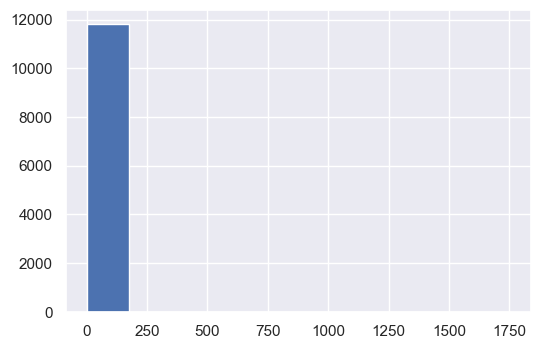

In [167]:
# Get count of target class
train['Radiation'].value_counts().hist()

### Check Correlations 

You can plot a correlation matrix to check correlation between variables. Each cell in the matrix shows the correlation between two variables.

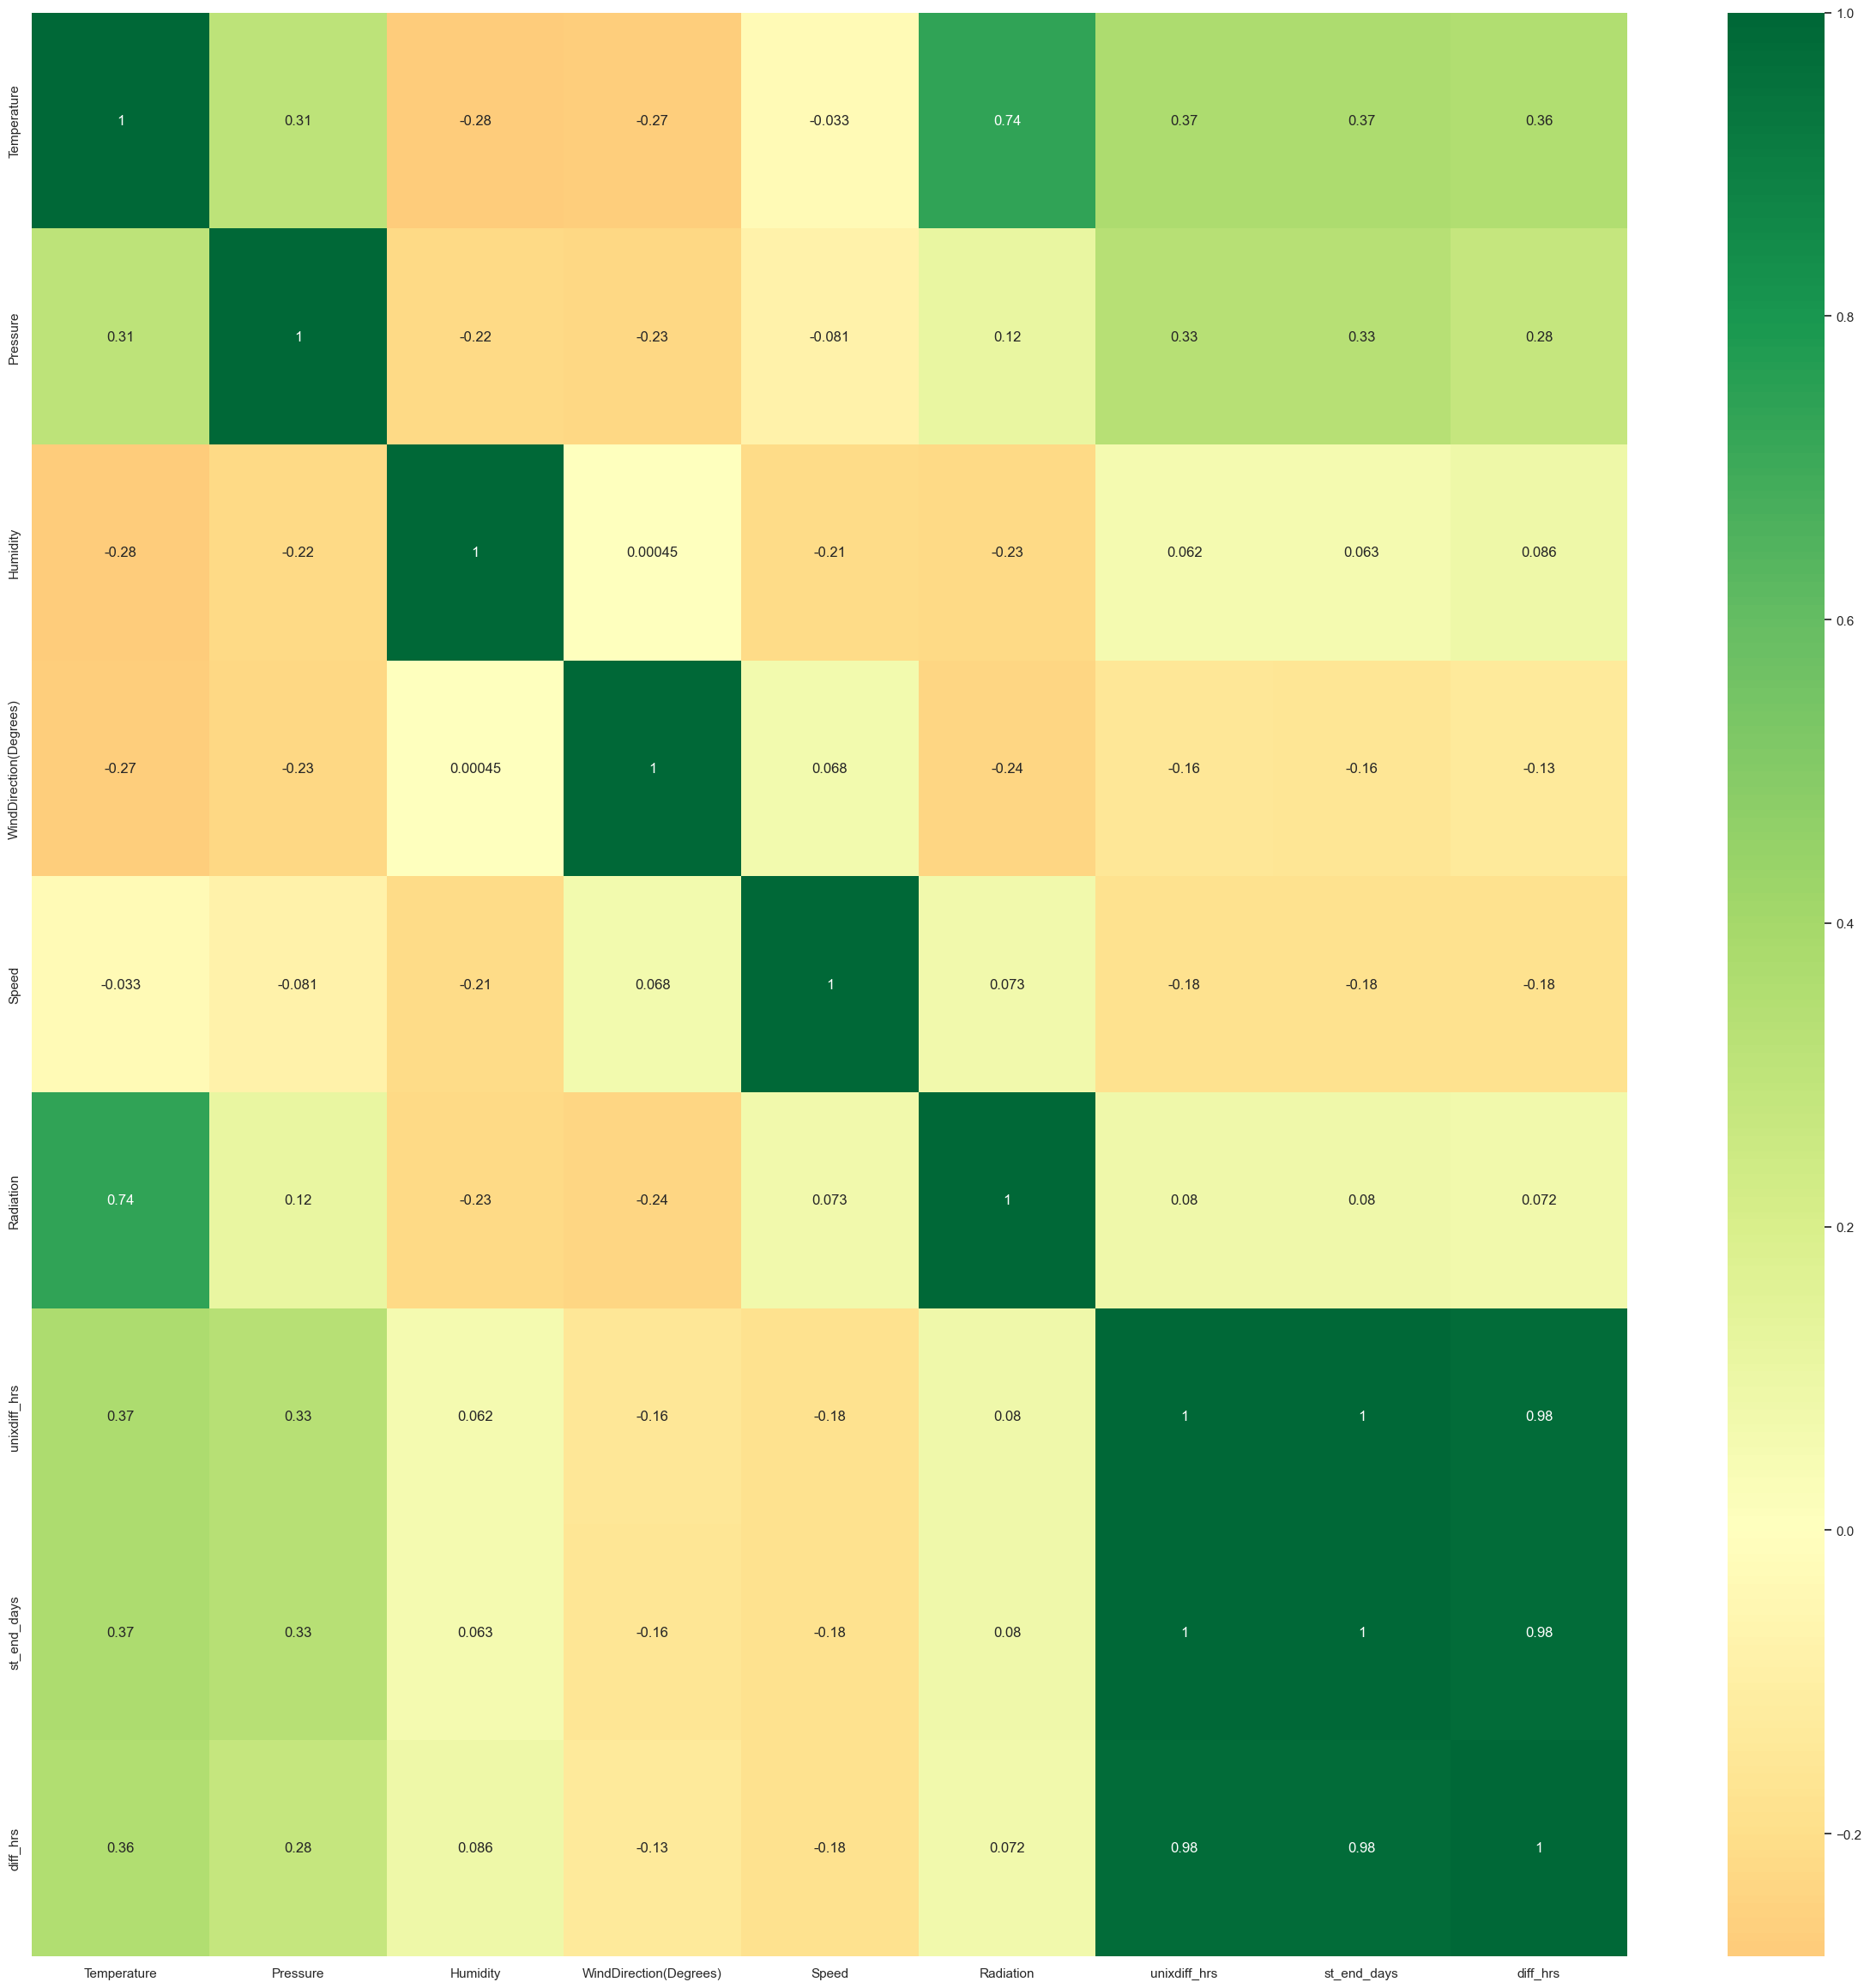

In [168]:
# Let's check the correlations between all variables
plt.figure(figsize=(30,30))
p=sns.heatmap(train.corr(), annot=True,cmap='RdYlGn',center=0) 

In [169]:
train[["Time","Radiation"]] [train["Radiation"]== train["Radiation"].max()]

,Time,Radiation
21409,2021-12-15 12:15:04,1601.26


In [170]:
avg_rad = pd.DataFrame(train.groupby('WindDirection(Degrees)')['Radiation'].mean())
avg_rad.columns = ['Average Radiation']
avg_rad.head()

,Average Radiation
WindDirection(Degrees),
0.09,1.225000
0.10,336.666774
0.11,618.390000
0.12,612.079310
0.13,652.078750


In [171]:
train["Temperature"].describe()

count    26148.000000
mean        51.104865
std          6.213912
min         34.000000
25%         46.000000
50%         50.000000
75%         55.000000
max         71.000000
Name: Temperature, dtype: float64

In [172]:
temp_rad = train.groupby(['Temperature'], as_index=False)[['Radiation','Temperature']].max().sort_values(by='Radiation', ascending = False)
trans_rad = temp_rad.rename(columns = {'Radiation':'Radiation Max '})
trans_rad.head(10)

,Radiation Max,Temperature
27,1601.26,61
26,1475.40,60
24,1451.41,58
19,1410.52,53
29,1387.17,63
23,1288.17,57
25,1279.23,59
30,1264.07,64
28,1248.63,62
20,1239.78,54


In [173]:
(train
 .sort_values('Radiation')
 .groupby('Radiation')['Pressure']
 .agg(['sum', 'mean', 'std'])
 )

,sum,mean,std
Radiation,,,
1.13,91.17,30.390000,0.051962
1.14,121.58,30.395000,0.020817
1.15,1064.27,30.407714,0.057858
1.16,2067.59,30.405735,0.059156
1.17,5351.52,30.406364,0.060080
...,...,...,...
1387.17,30.40,30.400000,NaN
1410.52,30.49,30.490000,NaN
1451.41,30.43,30.430000,NaN


In [174]:
train[["Temperature","Radiation"]] [train["Temperature"]== train["Temperature"].min()]

,Temperature,Radiation
22344,34,1.21


## Analyze numerical columns (grouped by target class)

In [175]:
print(train.shape)
print(test.shape)

(26148, 14)
(6538, 13)


In [176]:
# Training data
print("Old training shape",test.shape)
for cols in train_numcols:
    
    # Remove outliers
    Q1 = train[[cols]].quantile(0.25)
    Q3 = train[[cols]].quantile(0.75)
    IQR = Q3 - Q1
    train = train[~((train[[cols]] < (Q1 - 1.5 * IQR)) |(train[[cols]] > (Q3 + 1.5 * IQR))).any(axis=1)]   
    #df = train[~((train[[cols]] < (Q1 - 1.5 * IQR)) |(train[[cols]] > (Q3 + 1.5 * IQR))).any(axis=1)]   
    train    

Old training shape (6538, 13)


In [177]:
print("New training shape", train.shape)
train.head()

New training shape (21329, 14)


,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,unixdiff_hrs,st_end_days,diff_hrs
0,2016-09-14 18:50:05,2016-09-14 00:00:00,2021-12-15 08:50:05,57,30.45,68,26.70,4.50,2021-12-15 06:10:00,2021-12-15 18:26:00,680.04,46022.0,1918.368113,12.266667
1,2016-10-12 17:25:21,2016-10-12 00:00:00,2021-12-15 07:25:21,50,30.47,96,144.96,10.12,2021-12-15 06:16:00,2021-12-15 18:02:00,277.37,45350.0,1890.309271,11.766667
2,2016-11-01 09:40:20,2016-10-31 00:00:00,2021-12-15 23:40:20,47,30.48,56,119.52,3.37,2021-12-15 06:23:00,2021-12-15 17:49:00,1.29,44894.0,1871.986343,11.433333
3,2016-09-04 18:25:05,2016-09-04 00:00:00,2021-12-15 08:25:05,57,30.47,93,38.61,2.25,2021-12-15 06:08:00,2021-12-15 18:35:00,544.75,46262.0,1928.350752,12.450000
5,2016-12-29 12:45:43,2016-12-29 00:00:00,2021-12-15 02:45:43,37,30.35,54,177.00,6.75,2021-12-15 06:56:00,2021-12-15 17:53:00,1.15,43478.0,1812.115081,10.950000


In [178]:
print("Old test shape",test.shape)
# TEsting data
for cols in test_numcols:
    
    # Remove outliers
    Q1 = test[[cols]].quantile(0.25)
    Q3 = test[[cols]].quantile(0.75)
    IQR = Q3 - Q1
    test = test[~((test[[cols]] < (Q1 - 1.5 * IQR)) |(test[[cols]] > (Q3 + 1.5 * IQR))).any(axis=1)]        
    test   

Old test shape (6538, 13)


In [179]:
print("new test shape", test.shape)
test.head()

new test shape (5787, 13)


,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,unixdiff_hrs,st_end_days,diff_hrs
0,2016-11-09 19:35:07,2016-11-09 00:00:00,2021-12-15 09:35:07,59,30.47,44,312.67,3.37,2021-12-15 06:28:00,2021-12-15 17:45:00,44678.0,1862.399387,11.283333
1,2016-09-16 22:05:03,2016-09-16 00:00:00,2021-12-15 12:05:03,59,30.48,83,38.01,6.75,2021-12-15 06:10:00,2021-12-15 18:25:00,45974.0,1916.503507,12.250000
2,2016-10-10 14:20:21,2016-10-10 00:00:00,2021-12-15 04:20:21,47,30.39,78,213.62,5.62,2021-12-15 06:16:00,2021-12-15 18:03:00,45398.0,1892.180799,11.783333
3,2016-12-11 16:50:56,2016-12-11 00:00:00,2021-12-15 06:50:56,45,30.40,98,176.63,4.50,2021-12-15 06:47:00,2021-12-15 17:44:00,43910.0,1830.285370,10.950000
4,2016-10-26 14:45:17,2016-10-26 00:00:00,2021-12-15 04:45:17,45,30.40,34,175.89,6.75,2021-12-15 06:21:00,2021-12-15 17:52:00,45014.0,1876.198113,11.516667


# Draw Plot

plt.figure(figsize=(5, 5), dpi=100)
#sns.boxplot(x='Radiation', y=cols, data=df, notch=False)
#sns.distplot(x=cols, data=df, notch=False)
sns.distplot(x=cols)
plt.title('Box Plot of ' + cols + ' by Radiation ', fontsize=10)
plt.show()

Text(0.5, 0.98, "Histogram for ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Radiation', 'unixdiff_hrs', 'st_end_days', 'diff_hrs']")

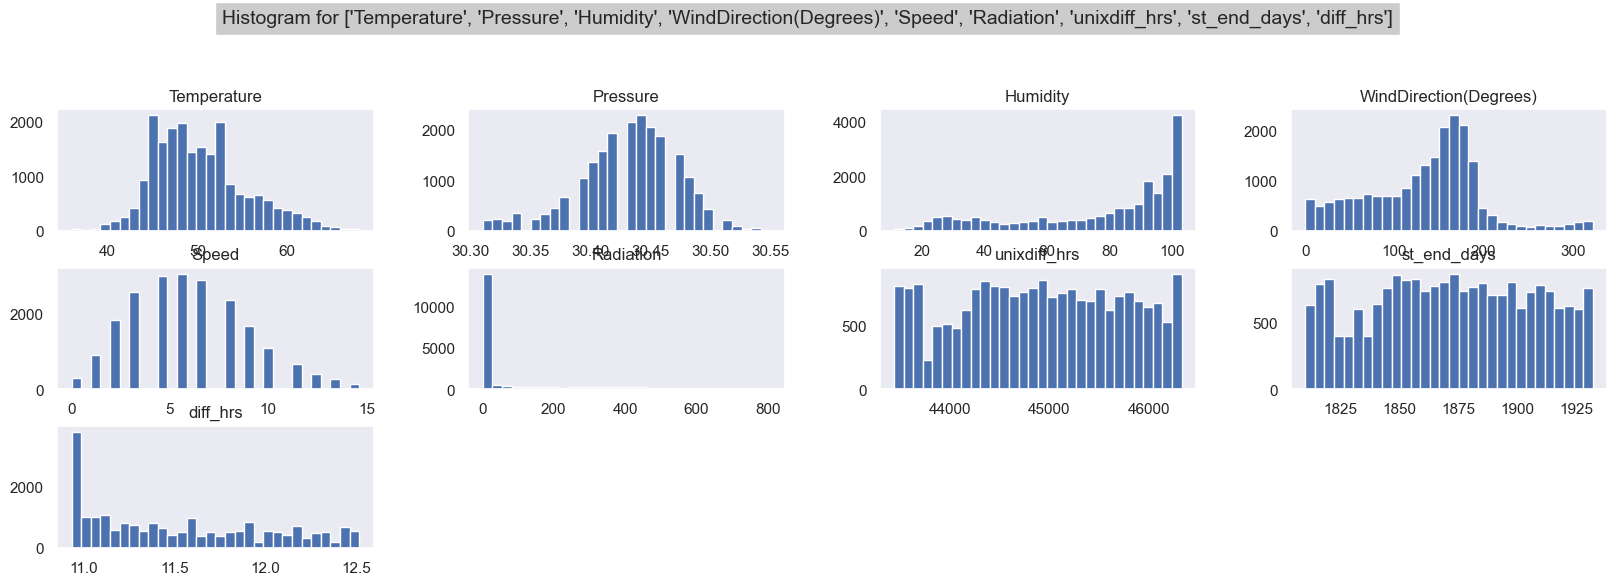

In [182]:
train.hist(figsize=(20,10), grid=False, layout=(5, 4), bins = 30)
plt.suptitle("Histogram for "+ str(train_numcols), bbox={'facecolor':'0.8', 'pad':5},fontsize = 14)

In [183]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vartrain = train[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
                   'Speed','unixdiff_hrs', 'st_end_days', 'diff_hrs']]
vif = pd.DataFrame()
vif['features'] = vartrain.columns
vif['VIF'] = [variance_inflation_factor(vartrain.values, i) for i in range(vartrain.shape[1])]
#vif['VIF'] = [variance_inflation_factor(train_numcols, i) for i in range(0,len(train_numcols))]
vif

,features,VIF
0,Temperature,1.442619e+02
1,Pressure,2.691518e+04
2,Humidity,1.136858e+01
3,WindDirection(Degrees),6.851020e+00
4,Speed,5.534240e+00
5,unixdiff_hrs,3.998104e+07
6,st_end_days,4.011331e+07
7,diff_hrs,1.349485e+04


In [184]:
train_numcols

['Temperature',
 'Pressure',
 'Humidity',
 'WindDirection(Degrees)',
 'Speed',
 'Radiation',
 'unixdiff_hrs',
 'st_end_days',
 'diff_hrs']

## 7. Statistical Significance Test



In [185]:
from scipy.stats import chi2_contingency
# significance value
from sklearn.feature_selection import SelectKBest,f_regression
select_features = SelectKBest(f_regression, k='all')
#X=train.drop('Radiation',axis=1)
X=train[train_numcols]
y=train['Radiation']
select_features.fit_transform(X, y)
select_features.pvalues_

array([0.00000000e+00, 1.81158168e-36, 3.98555574e-72, 0.00000000e+00,
       9.68792677e-02, 0.00000000e+00, 1.43949728e-01, 1.43715464e-01,
       6.16564104e-02])

In [186]:
# Creating a list of feature names
feature_names = X[train_numcols].iloc[:,0:10].columns
for score, name in zip(select_features.pvalues_, feature_names):
    print('Feature Score of', name, ':', score)

Feature Score of Temperature : 0.0
Feature Score of Pressure : 1.8115816846408544e-36
Feature Score of Humidity : 3.9855557369286235e-72
Feature Score of WindDirection(Degrees) : 0.0
Feature Score of Speed : 0.09687926774295386
Feature Score of Radiation : 0.0
Feature Score of unixdiff_hrs : 0.14394972811551018
Feature Score of st_end_days : 0.14371546439779678
Feature Score of diff_hrs : 0.061656410364561695


In [187]:
train.drop(['UNIXTime', 'Data', 'Time','TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)
test.drop(['UNIXTime', 'Data', 'Time','TimeSunRise', 'TimeSunSet'], axis = 1, inplace = True)

In [188]:
train.columns

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'Radiation', 'unixdiff_hrs', 'st_end_days', 'diff_hrs'],
      dtype='object')

In [189]:
test.columns

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'unixdiff_hrs', 'st_end_days', 'diff_hrs'],
      dtype='object')

In [190]:
# Save train df to csv file 
train.to_csv("train_radiation_post.csv",index = False)
test.to_csv("test_radiation_post.csv",index = False)

##  8. Model Building

Finally, model building starts.

In [191]:
# Read train df
train = pd.read_csv("train_radiation_post.csv")
test = pd.read_csv("test_radiation_post.csv")
train

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation,unixdiff_hrs,st_end_days,diff_hrs
0,57,30.45,68,26.70,4.50,680.04,46022.0,1918.368113,12.266667
1,50,30.47,96,144.96,10.12,277.37,45350.0,1890.309271,11.766667
2,47,30.48,56,119.52,3.37,1.29,44894.0,1871.986343,11.433333
3,57,30.47,93,38.61,2.25,544.75,46262.0,1928.350752,12.450000
4,37,30.35,54,177.00,6.75,1.15,43478.0,1812.115081,10.950000
...,...,...,...,...,...,...,...,...,...
21324,46,30.47,36,180.23,6.75,1.23,44630.0,1860.246551,11.250000
21325,44,30.37,100,162.80,3.37,1.47,46142.0,1923.125289,12.366667
21326,48,30.42,64,158.90,4.50,1.20,45734.0,1906.955081,12.050000
21327,56,30.42,99,55.72,13.50,659.12,45590.0,1900.562743,11.933333


In [192]:
import sweetviz as sv
sweet_report = sv.analyze(train)
sweet_report.show_html('Radiation_postprocess_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Radiation_postprocess_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [193]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21329 entries, 0 to 21328
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             21329 non-null  int64  
 1   Pressure                21329 non-null  float64
 2   Humidity                21329 non-null  int64  
 3   WindDirection(Degrees)  21329 non-null  float64
 4   Speed                   21329 non-null  float64
 5   Radiation               21329 non-null  float64
 6   unixdiff_hrs            21329 non-null  float64
 7   st_end_days             21329 non-null  float64
 8   diff_hrs                21329 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 1.5 MB


In [194]:
train_numcols

['Temperature',
 'Pressure',
 'Humidity',
 'WindDirection(Degrees)',
 'Speed',
 'Radiation',
 'unixdiff_hrs',
 'st_end_days',
 'diff_hrs']

In [195]:
traincopy1 = train.copy()

###  Preparing X and y using pandas

In [196]:
# seperating independent and dependent variables
# create a Python list of feature names
feature_cols = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
                'unixdiff_hrs', 'st_end_days', 'diff_hrs' ]
X = train.drop("Radiation", axis = 1)
y = train['Radiation']
print(X.shape, y.shape)

(21329, 8) (21329,)


###  Splitting X and y into training and test datasets.

In [197]:
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.30, random_state=10)
print(Xtrain.shape)
print(ytrain.shape)

(14930, 8)
(14930,)


### Scaling

In [198]:
sc = StandardScaler()
feature_cols = ['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
                'unixdiff_hrs', 'st_end_days', 'diff_hrs' ]
Xtrain[feature_cols] = sc.fit_transform(Xtrain[feature_cols])
Xtest[feature_cols] = sc.transform(Xtest[feature_cols])
# on the new testing data
Xnewtest = test.copy()
Xnewtest[feature_cols] = sc.transform(Xnewtest[feature_cols])

In [199]:
Xtrain.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,unixdiff_hrs,st_end_days,diff_hrs
8044,-0.220734,-0.962127,0.943569,1.976891,-0.128864,-1.220608,-1.210544,-1.171750
17301,0.724040,-0.962127,0.828461,-1.098607,0.250389,-0.634756,-0.631275,-0.835279
15687,1.290905,-0.250012,-1.627160,-0.003052,0.626285,-1.659996,-1.656388,-1.205397
13724,0.346131,0.224732,0.828461,-0.325465,-0.504761,1.562187,1.557607,1.789193
3006,-0.976554,-0.724755,-1.320208,0.506790,-0.128864,-1.542826,-1.551026,-1.205397


In [200]:
# Testing data after splitting
Xtest.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,unixdiff_hrs,st_end_days,diff_hrs
14324,-0.409689,0.936848,-1.512053,0.703217,-0.504761,-0.341830,-0.355467,-0.566102
18357,-1.732374,-2.861103,0.444770,0.713147,-0.504761,-1.777167,-1.789630,-1.171750
14221,-0.031779,0.224732,0.981938,-0.457348,-1.639163,0.800580,0.787944,0.779781
4295,-0.976554,-0.250012,-1.512053,0.774279,0.250389,-0.107490,-0.115248,-0.330573
5188,1.668815,1.411592,0.751723,-0.072872,1.381435,1.269261,1.267147,1.419075


In [201]:
#new test data set
Xnewtest.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,unixdiff_hrs,st_end_days,diff_hrs
0,1.668815,0.936848,-1.243469,2.763686,-0.884013,-0.283245,-0.286106,-0.498808
1,1.668815,1.174220,0.252925,-1.497823,0.250389,1.298554,1.298571,1.452722
2,-0.598644,-0.962127,0.061080,1.226868,-0.128864,0.595532,0.586173,0.510604
3,-0.976554,-0.724755,0.828461,0.652947,-0.504761,-1.220608,-1.226706,-1.171750
4,-0.976554,-0.724755,-1.627160,0.641465,0.250389,0.126851,0.118050,-0.027749


In [202]:
# calculate the f_values and p_values for all the features
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(Xtrain, ytrain)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(Xtrain.shape[1])), y=p_values, mode="markers"))
fig.update_layout( title="Feature Selection", yaxis_title="P-Value", 
    xaxis=dict(title="Features", tickmode="array",tickvals=list(range(Xtrain.shape[1])),
        ticktext=[col for col in Xtrain.columns],),)
fig.show()



### Ordinary Least Square Regression

Let's start with OLS Regression

In [203]:
Xtrainols = Xtrain.copy()
ytrainols = ytrain.copy()

In [204]:
#Normal linear regression(Ordinary Least Square Regression) does not have any hyperparameters to tune.
olsmod = sm.OLS(ytrainols, Xtrainols)
olsres = olsmod.fit()
print(olsres.summary())
print("Standard errors: ", olsres.bse)
print("R-squared",olsres.rsquared)

                                 OLS Regression Results                                
Dep. Variable:              Radiation   R-squared (uncentered):                   0.418
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              1340.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):                        0.00
Time:                        15:43:20   Log-Likelihood:                         -99707.
No. Observations:               14930   AIC:                                  1.994e+05
Df Residuals:                   14922   BIC:                                  1.995e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

### Linear  Regression

In [205]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)
# Its hard to remember the order of the feature names, we so we are zipping the features to pair 
#the feature names with the coefficients
print("Intercept is ",lr.intercept_)
# Examine coefs
lr_coefs = [(col, coef) for col, coef in zip(Xtrain.columns, lr.coef_)]
print(lr_coefs)
sorted(lr_coefs, key = lambda x: -x[1]) # -x gives you descending order

Intercept is  125.76655592763393
[('Temperature', 166.31332100381374), ('Pressure', -9.001570635943839), ('Humidity', 8.930487183599157), ('WindDirection(Degrees)', -30.600527284558943), ('Speed', 15.217086393122145), ('unixdiff_hrs', 4165.351833579926), ('st_end_days', -4211.066349145369), ('diff_hrs', -13.915702077279786)]


[('unixdiff_hrs', 4165.351833579926),
 ('Temperature', 166.31332100381374),
 ('Speed', 15.217086393122145),
 ('Humidity', 8.930487183599157),
 ('Pressure', -9.001570635943839),
 ('diff_hrs', -13.915702077279786),
 ('WindDirection(Degrees)', -30.600527284558943),
 ('st_end_days', -4211.066349145369)]

In [206]:
print("Training R2")
print(lr.score(Xtrain,ytrain))
print("Testing R2")
print(lr.score(Xtest,ytest))


Training R2
0.5565901620618917
Testing R2
0.5400966784312193


In [207]:
# making predictions on test set
#y_pred = regressor.predict(X_test)
ypredtrain = lr.predict(Xtrain)
ypredtest = lr.predict(Xtest)
yprednewtest = lr.predict(Xnewtest)
print("Training data results",ypredtrain)
print("Splitted test  data results",ypredtest)
print("New Testing data results",yprednewtest)


Training data results [ 73.41454678 325.65462353 415.26937088 ...  64.4497128  -71.83308255
  31.79553691]
Splitted test  data results [ 87.42031819 -12.09505833 122.04037858 ... 375.52125044 -13.55714279
 -29.94306527]
New Testing data results [317.68992799 364.99547819   0.98610104 ... 184.8825935  132.7066208
 433.28429862]


In [208]:
ypredtrain.shape,ypredtest.shape,yprednewtest.shape

((14930,), (6399,), (5787,))

In [209]:
#Measuring accuracy on Testing Data
print('Accuracy of testing data is ',100- (np.mean(np.abs((ytest - ypredtest) / ytest)) * 100))
#Measuring accuracy on Training  Data
accLR = 100-(np.mean(np.abs((ytrain - ypredtrain) / ytrain)))
print('Accuracy of training data is ',accLR)

Accuracy of testing data is  -3450.521483163441
Accuracy of training data is  64.23470545297829


In [210]:
# Computing the MSE for our resale value predictions¶
MAE_train = metrics.mean_absolute_error(ytrain, ypredtrain)
MAE_test = metrics.mean_absolute_error(ytest, ypredtest)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))
print('*****************************************************')
MSE_train = metrics.mean_squared_error(ytrain, ypredtrain)
MSE_test = metrics.mean_squared_error(ytest, ypredtest)
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))
print('*****************************************************')
RMSE_train = np.sqrt(metrics.mean_squared_error(ytrain, ypredtrain))
RMSE_test = np.sqrt(metrics.mean_squared_error(ytest, ypredtest))
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))
print('*****************************************************')
r2train = metrics.r2_score(ytrain, ypredtrain)
r2test = metrics.r2_score(ytest, ypredtest)
print("R2 score for training set is {}".format(r2train))
print("R2 score for test set is {}".format(r2test))
print('*****************************************************')
adj_rsquared_train = 1 - \
    (1-r2train)*(len(ytrain)-1)/(len(ytrain)-Xtrain.shape[1]-1)
adj_rsquared_test = 1 - (1-r2test)*(len(ytest)-1) / \
    (len(ytest)-Xtest.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_rsquared_train))
print("Adjusted R2 score for test set is {}".format(adj_rsquared_test))

MAE for training set is 108.87519252223662
MAE for test set is 112.13731299594826
*****************************************************
MSE for training set is 21184.531681780223
MSE for test set is 22341.276136725864
*****************************************************
RMSE for training set is 145.54906966992343
RMSE for test set is 149.469984066119
*****************************************************
R2 score for training set is 0.5565901620618917
R2 score for test set is 0.5400966784312193
*****************************************************
Adjusted R2 score for training set is 0.5563524247317191
Adjusted R2 score for test set is 0.5395208996248735


In [211]:
#With Pipeline

#X = train[feature_cols]
#y = train['Radiation']
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.30, random_state=10)
pipe = Pipeline((
#("mms",MinMaxScaler()),
("lr", LinearRegression()),
))
pipe.fit(Xtrain,ytrain)
print("Training R2")
print(pipe.score(Xtrain,ytrain))
print("Testing R2")
print(pipe.score(Xtest,ytest))
scoresdt = cross_val_score(pipe,Xtrain,ytrain,cv=10)
print(scoresdt)
print("Average R2")
print(np.mean(scoresdt))
print("IN linear regresiion coeffiecients are ",pipe['lr'].coef_)

Training R2
0.5565901620618917
Testing R2
0.5400966784312193
[0.5411441  0.5486423  0.57179236 0.57090181 0.56347482 0.54962013
 0.55365068 0.5704415  0.54533873 0.54280154]
Average R2
0.5557807978436659
IN linear regresiion coeffiecients are  [  166.313321      -9.00157064     8.93048718   -30.60052728
    15.21708639  4165.35183358 -4211.06634915   -13.91570208]


In [212]:
import time
#clfs = [LinearRegression(), RandomForestRegressor(n_estimators=25,random_state=42)]
#PolynomialFeatures(degree=1)
clfs = [LinearRegression(),RandomForestRegressor(n_estimators=28,random_state=10), 
        GradientBoostingRegressor(n_estimators=100,random_state=10),
        RFE(estimator=LinearRegression(),n_features_to_select=70),
        DecisionTreeRegressor(max_depth=20,random_state=10)
       ]

for clf in clfs:
      # Extracting model name
      model_name = type(clf).__name__

      # Calculate start time
      start_time = time.time()

      # Train the model
      clf.fit(Xtrain, ytrain)
      
      # Make predictions on the trained model
      ytrainpredict = clf.predict(Xtrain)
      ytestpredict = clf.predict(Xtest)  
      ynewtestpredict = clf.predict(Xnewtest)

      # Estimating the model performance
      RMSE = np.sqrt(metrics.mean_squared_error(ytest, ytestpredict))
      R_squared = metrics.r2_score(ytest, ytestpredict)

      # Calculate evaluated time
      elapsed_time = (time.time() - start_time)

      # Display the metrics and time took to develop the model
      print('Performance Metrics of ', model_name, ':')
      print('[RMSE]:', RMSE, '[R-Squared]:', R_squared, '[Processing Time]:', elapsed_time, 'seconds')
      print('----------------------------------------\n')

Performance Metrics of  LinearRegression :
[RMSE]: 149.469984066119 [R-Squared]: 0.5400966784312193 [Processing Time]: 0.027927398681640625 seconds
----------------------------------------

Performance Metrics of  RandomForestRegressor :
[RMSE]: 89.1866627859341 [R-Squared]: 0.8362586385466468 [Processing Time]: 3.8746440410614014 seconds
----------------------------------------

Performance Metrics of  GradientBoostingRegressor :
[RMSE]: 122.5559138187908 [R-Squared]: 0.6908088070784701 [Processing Time]: 3.8197855949401855 seconds
----------------------------------------

Performance Metrics of  RFE :
[RMSE]: 149.469984066119 [R-Squared]: 0.5400966784312193 [Processing Time]: 0.01789402961730957 seconds
----------------------------------------

Performance Metrics of  DecisionTreeRegressor :
[RMSE]: 113.67627160565048 [R-Squared]: 0.7339898477382403 [Processing Time]: 0.2054154872894287 seconds
----------------------------------------



In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(1,100,7)
train_scores, test_scores = validation_curve(
    RandomForestRegressor(), Xtrain, ytrain, param_name="n_estimators", param_range=param_range,n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Random Forest Regressor")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
#Printing some sample values of prediction for test data
p_test = 'radiation_pred'
test_cols = Xnewtest.columns
test_results = pd.DataFrame(data=Xnewtest, columns=test_cols)
test_results[('new test data ' + p_test)]=ynewtestpredict.round(0)
test_results.head(10)

In [ ]:
# To create Dataframe of predicted value with particular respective index
predicted_rad = pd.DataFrame(ynewtestpredict.round(0)) 
predicted_rad.index = Xnewtest.index 
predicted_rad.columns = ["radiation_prediction"]
predicted_rad.to_csv('radiation_project_submission_sagar.csv',header=False)

In [ ]:
predicted_rad